🔍The task of handwritten digit recognition is a core problem in pattern recognition and machine learning. The challenge lies in accurately predicting digits from images with real-world variability, such as varying handwriting styles, ink, and writing quality.

In [1]:
from tensorflow.keras.datasets import mnist


✅ Step-by-Step: Load MNIST Dataset from URL in Jupyter Notebook

🔗 Step 1: Download MNIST .npz File from URL

In [2]:
import urllib.request

url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
file_path = "mnist.npz"

# Download the file
urllib.request.urlretrieve(url, file_path)
print("✅ MNIST dataset downloaded!")


✅ MNIST dataset downloaded!


📦 Step 2: Load Data from Downloaded File

In [3]:
import numpy as np

with np.load('mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("✅ Dataset loaded from URL and preprocessed!")


✅ Dataset loaded from URL and preprocessed!


🧠 Step 3: Continue with Model Building
Now you can plug this into the CNN model I gave earlier. Here's the model again for quick reference:

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8767 - loss: 0.4176 - val_accuracy: 0.9817 - val_loss: 0.0637
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9813 - loss: 0.0618 - val_accuracy: 0.9890 - val_loss: 0.0413
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9886 - loss: 0.0384 - val_accuracy: 0.9898 - val_loss: 0.0337
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9902 - val_loss: 0.0338
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9903 - val_loss: 0.0358


Sure! After training your digit recognition model, you can use the following code to generate:

✅ A bar plot showing prediction counts

✅ A confusion matrix to evaluate per-class accuracy

📊 Step 1: Bar Plot of Predicted Labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


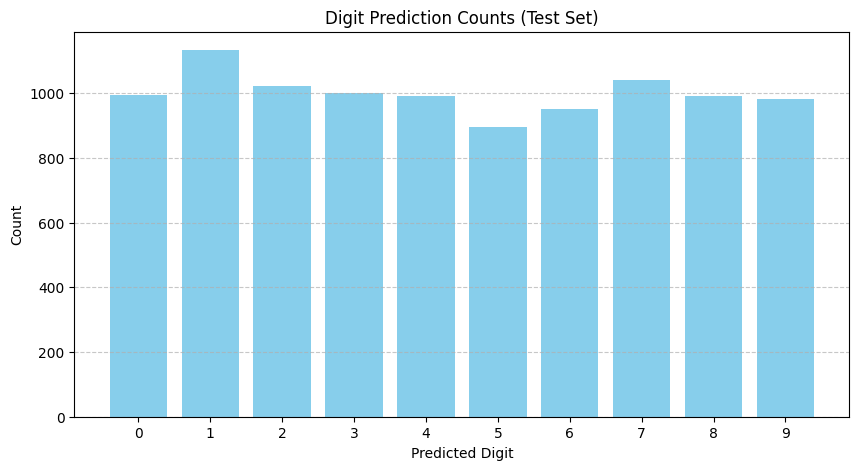

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Count occurrences
unique, counts = np.unique(predicted_classes, return_counts=True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='skyblue')
plt.xticks(np.arange(10))
plt.xlabel("Predicted Digit")
plt.ylabel("Count")
plt.title("Digit Prediction Counts (Test Set)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


📉 Step 2: Confusion Matrix with Heatmap

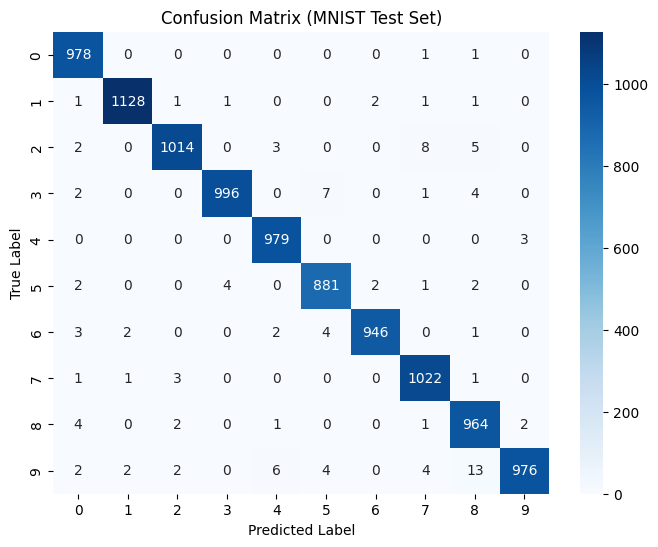

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MNIST Test Set)")
plt.show()


Bar Plot: Shows how many times each digit was predicted.

Confusion Matrix: Shows where the model confuses digits (e.g., misclassifying a 4 as a 9).